Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lucas Resende Pellegrinelli Machado"
COLLABORATORS = ""

---

# Lista 03 - ICs + Bootstrap

In [2]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados ```enem2015.csv```.

In [3]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


In [4]:
df.describe()

,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
count,1685.000000,1683.000000,1685.000000
mean,575.391745,86.044444,75.263669
std,40.796223,10.334011,16.886193
min,487.007141,47.700000,50.000000
25%,544.937500,79.500000,59.615387
50%,561.520752,87.800000,72.916672
75%,607.530579,94.550000,92.857140
max,713.629028,100.000000,100.000000


A) Plote um histograma dos dados da coluna "NOTA_MEDIA_ESCOLA".

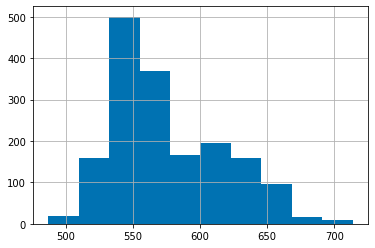

In [5]:
df["NOTA_MEDIA_ESCOLA"].hist()
plt.show()

B) Para o valor médio das notas as escolas, determine com 95% o intervalo de confiança. **Não utilize a técnica de bootstrap.**

Lembrando do conceito visto em aula:

$$\begin{align}
0.95 = P(-z \le Z \le z)=P \left(-1.96 \le \frac {\bar X-\mu}{\sigma/\sqrt{n}} \le 1.96 \right) = P \left( \bar X - 1.96 \frac \sigma {\sqrt{n}} \le \mu \le \bar X + 1.96 \frac \sigma {\sqrt{n}}\right).
\end{align}$$

Logo, a probabilidade da média da população estar entre $\bar{X} +- 1.96 \frac \sigma {\sqrt{n}}$ é de 95%.

Neste exercício você deverá retornar uma lista com os valores inferior e superior do intervalo de confiança.

In [6]:
def calcula_IC_notas(df):
    med = df["NOTA_MEDIA_ESCOLA"].mean()
    std = df["NOTA_MEDIA_ESCOLA"].std(ddof=1)
    siz = len(df["NOTA_MEDIA_ESCOLA"])
    inferior = med - 1.96 * std / siz ** (1/2)
    superior = med + 1.96 * std / siz ** (1/2)
    return [ inferior, superior ]

Para certificar que a sua função está retornando o intervalo correto, verifique se os valores abaixo 
são os mesmos para a sua função:
    
[573.4438030115773, 577.3396875055739]

Se eles não estiverem neste intervalo, qual pode ser o motivo ?

Verifique os parâmetros da função _np.std()_

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: O intervalo inclui a média da população com 95% de probabilidade
    2: 5% da amostra está a mais que 1.96 de distância da média da população
    3: 95% dos valores da população estão dentro do intervalo
    4: A média da amostra está com 95% de probabilidade dentro do intervalo
    5: Nenhuma das anteriores

In [7]:
def resposta():
    return 1

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando **bootstrap**.

A) Utilizando o mesmo atributo do exercício anterior, execute um bootstrap com 5000 amostras.

Lembre do conceito visto em aula:

"Para implementar o Bootstrap, vamos implementar uma função. A mesma faz uso da função _sample_ que gera uma amostra aleatória de _n_ elementos retirados do dataframe. Note que estamos fazendo um bootstrap da **mediana**, podemos fazer patra outras medidas centrais."

1. Dado _n_ e _size_
2. Gere _n_ amostras de tamanho _size_ com reposição
3. Tira a mediana
4. Retorne as novas amostras e veja a distribuição das mesmas

In [8]:
nme = df['NOTA_MEDIA_ESCOLA']
N = 5000
S = len(nme)

def bootstrap_median(nme, n, size):
    medians = []
    for _ in range(n):
        sample = nme.sample(size, replace=True)
        medians.append(sample.median())
    return medians
    

B) Plote a distribuição das medianas.

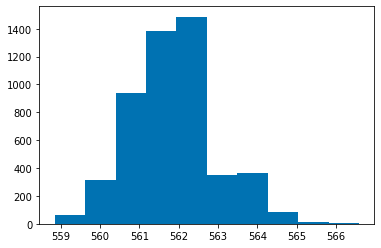

In [9]:
bm_values = bootstrap_median(nme, N, S)

plt.hist(bm_values)
plt.show()

C) Faça uma função que indique onde ficam 95% dos dados sintéticos

In [10]:
def percentile(bm_values, init, final):
    inferior = np.percentile(bm_values, init)
    superior = np.percentile(bm_values, final)
    return [inferior, superior]

Na célula abaixo chame a função que você definiu acima. Altere os parâmetros _init_ e _final_ 
para que a resposta indique os 95%. 

In [11]:
percentile(bm_values, 2.5, 97.5)

[559.7595215, 564.0881347999999]

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [12]:
valores = pd.read_csv('lista.csv')['valores']
valores.head()

0    1.602521
1    6.313130
2    1.704995
3    4.370505
4    0.983462
Name: valores, dtype: float64

A) Calcule a média, mediana, variância e desvio padrão dos dados carregados acima. Retorne uma lista da seguinte forma:

```python
return [media, mediana, var, desvio]
```

In [13]:
def calcula_dist_lista(dados):
    media = np.mean(dados)
    mediana = np.median(dados)
    var = np.var(dados)
    desvio = np.std(dados)
    return [media, mediana, var, desvio]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne uma lista da seguinte forma:

```python
return [inferior, superior]
```

In [14]:
def calcula_dist_lista_IC(dados):
    inferior = np.percentile(dados, 2.5)
    superior = np.percentile(dados, 97.5)
    return [inferior, superior]

C) Plote a distribuição dos valores dos dados, em escala log-log. Verifque as funcões _xscale_ e _yscale_ da biblioteca matplotlib.

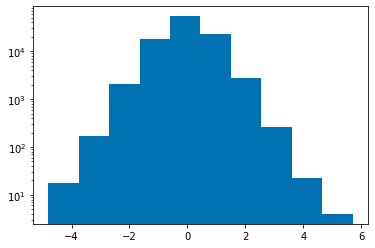

In [15]:
plt.hist(np.log10(valores))
plt.yscale("log")
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

A variância dos dados é absurdamente alta (aproximadamente 3257557) visto que apesar da maioria dos dados serem bem comportados, existem alguns dados que são bastante extremos (ou muito grandes ou muito pequenos). Com isso, a média e a mediana ficam bem distantes uma da outra.